In [2]:
import pandas as pd
import shap
import joblib

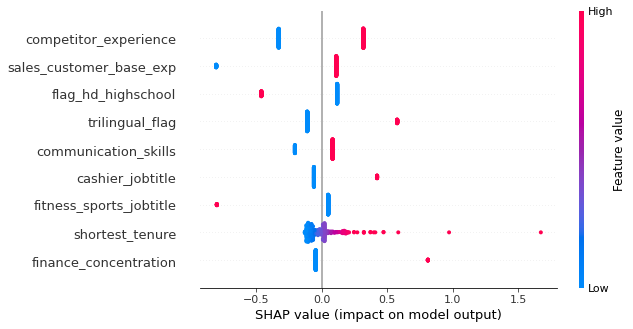

In [5]:
finalist = joblib.load(f"../result/result_fitted_finalist.sav")
trans_sel_train = pd.read_csv(f"../result/result_training_trans_sel.csv")
trans_sel_test = pd.read_csv(f"../result/result_testing_trans_sel.csv")

X_trans_sel_train = trans_sel_train.drop(columns=["employee_code", "hp_class"])
y_train = trans_sel_train["hp_class"]

X_trans_sel_test = trans_sel_train.drop(columns=["employee_code", "hp_class"])
y_test = trans_sel_test["hp_class"]

# The SHAP values for testing dataset
explainer = shap.LinearExplainer(finalist, X_trans_sel_test,
                                 feature_dependence="independent")
shap_values = explainer.shap_values(X_trans_sel_test)
X_test_array = X_trans_sel_test

shap.summary_plot(shap_values, X_test_array)